## **Project Name- Forecasting India’s EV Future: A Comprehensive Market Analytics Study**

**Project Type**    - EDA, Segmentation and Forcast

**Contribution**    - Individual

**Author**                - Tanmay Dhar

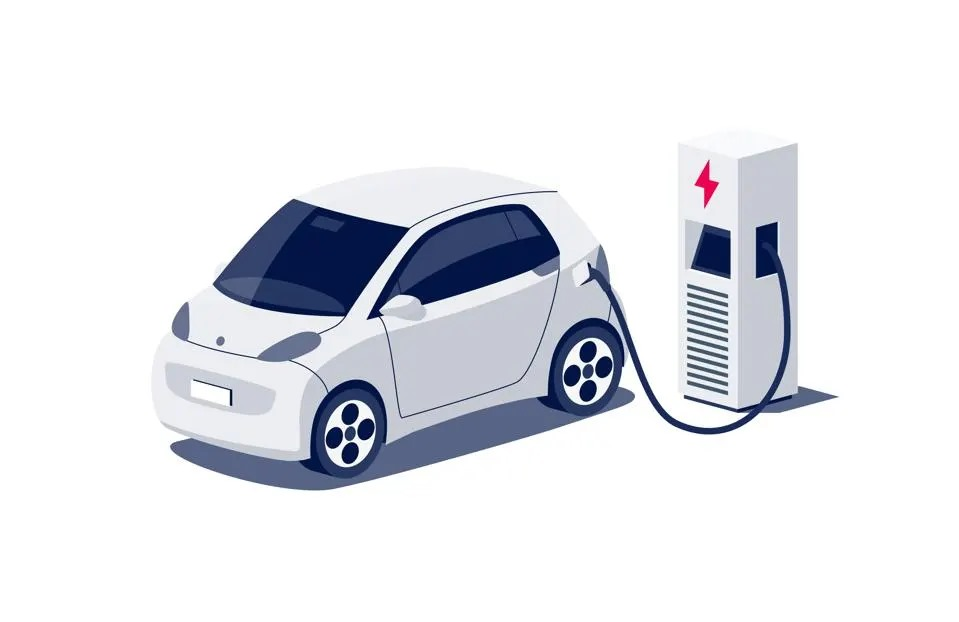

# 📊 About the Project

This project aims to analyze, segment and forcast the **Electric Vehicles (EV) Market in India** from **2001 to 2024** using comprehensive datasets on EV sales, manufacturer performance, vehicle classifications, and charging infrastructure. The primary objective is to identify **high-potential customer segments**, **optimal vehicle categories** and **forcast next 5 years** to inform strategic market decisions.

### 🎯 Project Objectives

1. **Identify High-Growth EV Categories:**
   - Determine which EV categories (**2W, 3W, 4W**) show the most promising growth trends.

2. **Geographic & Demographic Targeting:**
   - Pinpoint geographic regions and customer demographics best suited for early EV adoption.

3. **Impact Analysis:**
   - Analyze how sales trends, charging infrastructure, and manufacturer distribution influence market opportunities.

4. **Market Segmentation:**
   - Segment the market to understand regional differences and identify states with high growth potential.

5. **Strategic Recommendations:**
   - Provide actionable insights for EV manufacturers, policy-makers, and investors to optimize their strategies.



### Datasets Used

1. **EV Maker by Place.csv**
   - Contains a list of popular EV manufacturers and the locations of their manufacturing plants.

2. **OperationalPC.csv**
   - Provides data on the total number of operational public charging stations available for EVs in each state.

3. **Vehicle Class - All.csv**
   - Details the total number of vehicles registered/manufactured (including electric and other fuel types) by category from 2001 to August 2024.

4. **ev_cat_01-24.csv**
   - Shows the total electric vehicles manufactured** from 2001 to August 2024, categorized by vehicle type.

5. **ev_sales_by_makers_and_cat_15-24.csv**
   - Documents total electric vehicles manufactured by different makers from 2015 to August 2024, along with their respective vehicle classes.



### 🚀 Potential Applications

1. **Market Analysis:**
   - Evaluate growth trends and understand the market share of different EV manufacturers in India.

2. **Forecasting:**
   - Use historical data to predict future EV sales trends and inform strategic decisions.

3. **Research & Policy Development:**
   - Study EV adoption patterns and assess the impact of factors like charging infrastructure and government policies.

4. **Business Strategy:**
   - Help manufacturers and investors identify high-potential markets and guide resource allocation.



### Acknowledgments

This dataset was compiled and web-scraped from the [**Vahaan4 Dashboard**](https://vahan.parivahan.gov.in/vahan4dashboard/) and the [**Sarthi Dashboard**](https://sarathi.parivahan.gov.in/SarathiReport/DashBoardGr.do).

**Note:** Data for the names of manufacturers is available only from **2015 onwards**.



In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na option is deprecated.*")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the Datasets
ev_sales = pd.read_csv('/content/drive/MyDrive/EV Data/ev_sales_by_makers_and_cat_15-24.csv')
operational_pc = pd.read_csv('/content/drive/MyDrive/EV Data/OperationalPC.csv')
vehicle_class = pd.read_csv('/content/drive/MyDrive/EV Data/Vehicle Class - All.csv')
ev_category = pd.read_csv('/content/drive/MyDrive/EV Data/ev_cat_01-24.csv')
ev_maker_place = pd.read_csv('/content/drive/MyDrive/EV Data/EV Maker by Place.csv')


In [4]:
# Data Cleaning
vehicle_class['Total Registration'] = (
    vehicle_class['Total Registration'].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')
)

In [5]:
# Exploratory Data Analysis (EDA)

# 1. Sales Trend Over Years
yearly_sales = ev_sales.drop(columns=['Cat', 'Maker']).sum().reset_index()
yearly_sales.columns = ['Year', 'Total Sales']

In [6]:
# 2. Top 10 EV Makers by Sales
top_ev_makers = (
    ev_sales.assign(Total_Sales=lambda x: x.iloc[:, 2:].sum(axis=1))
    .groupby('Maker')['Total_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

In [7]:
# 3. Charging Infrastructure Distribution
charging_distribution = operational_pc.sort_values(by='No. of Operational PCS', ascending=False)

In [8]:
# 4. Vehicle Registrations by Class
vehicle_class_sorted = vehicle_class.sort_values(by='Total Registration', ascending=False)

In [9]:
# Replacing inf values and dropping NaNs for all relevant DataFrames
for df in [yearly_sales, top_ev_makers, charging_distribution]:
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)


# EV Sales Trend in India (2015–2024)

This plot shows the growth of EV sales over the years,

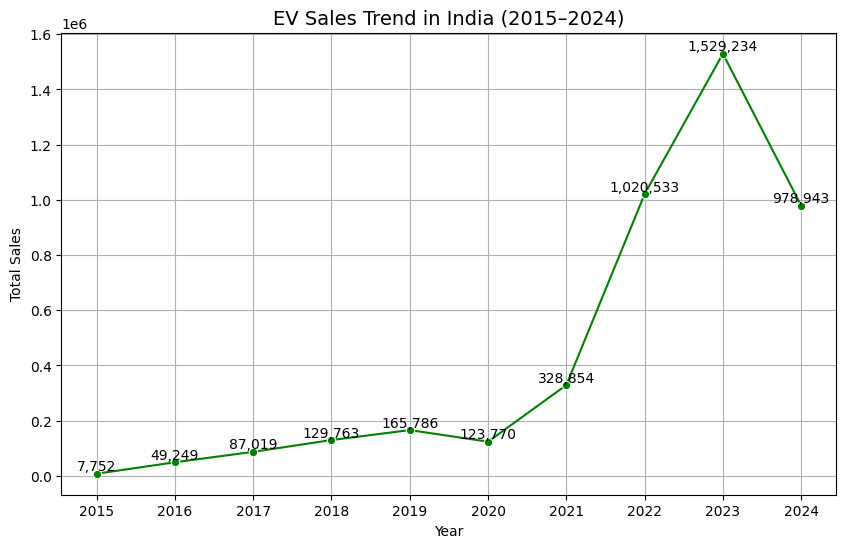

In [10]:
# EV Sales Trend in India (2015–2024)
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x='Year', y='Total Sales', marker='o', color='green')
for i in range(len(yearly_sales)):
    plt.text(yearly_sales['Year'][i], yearly_sales['Total Sales'][i],
             f"{yearly_sales['Total Sales'][i]:,}", ha='center', va='bottom')
plt.title('EV Sales Trend in India (2015–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Vehicle Registrations by Class


/tmp/ipython-input-12-1955175278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=vehicle_class_sorted['Vehicle Class'], x=vehicle_class_sorted['Total Registration'], palette='magma')


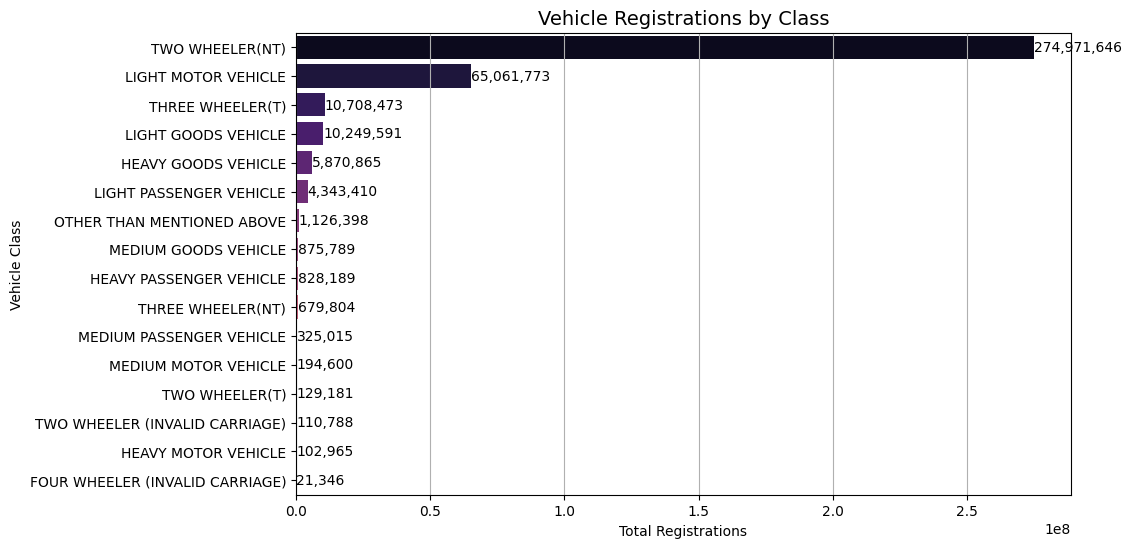

In [12]:
# Vehicle Registrations by Class
plt.figure(figsize=(10, 6))
sns.barplot(y=vehicle_class_sorted['Vehicle Class'], x=vehicle_class_sorted['Total Registration'], palette='magma')
for index, value in enumerate(vehicle_class_sorted['Total Registration']):
    plt.text(value, index, f'{value:,}', va='center')
plt.title('Vehicle Registrations by Class', fontsize=14)
plt.xlabel('Total Registrations')
plt.ylabel('Vehicle Class')
plt.grid(axis='x')
plt.show()

# Top 10 EV Makers by Total Sales

This horizontal bar plot highlights the top EV manufacturers based on their total sales volume.

/tmp/ipython-input-13-3026843249.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_ev_makers.index, x=top_ev_makers.values, palette='Blues_r')


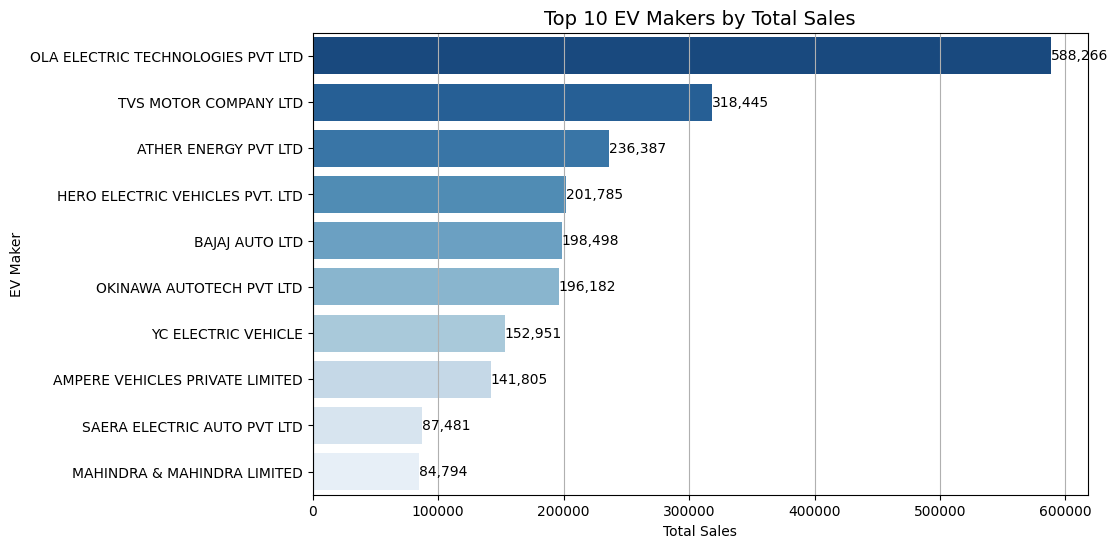

In [13]:
# Top 10 EV Makers by Total Sales
plt.figure(figsize=(10, 6))
sns.barplot(y=top_ev_makers.index, x=top_ev_makers.values, palette='Blues_r')
for index, value in enumerate(top_ev_makers.values):
    plt.text(value, index, f'{value:,}', va='center')
plt.title('Top 10 EV Makers by Total Sales', fontsize=14)
plt.xlabel('Total Sales')
plt.ylabel('EV Maker')
plt.grid(axis='x')
plt.show()

# Top 10 States with Public Charging Stations

This plot showcases the leading states with the highest number of operational public charging stations, crucial for EV adoption.

/tmp/ipython-input-14-3707538861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=charging_distribution.head(10),


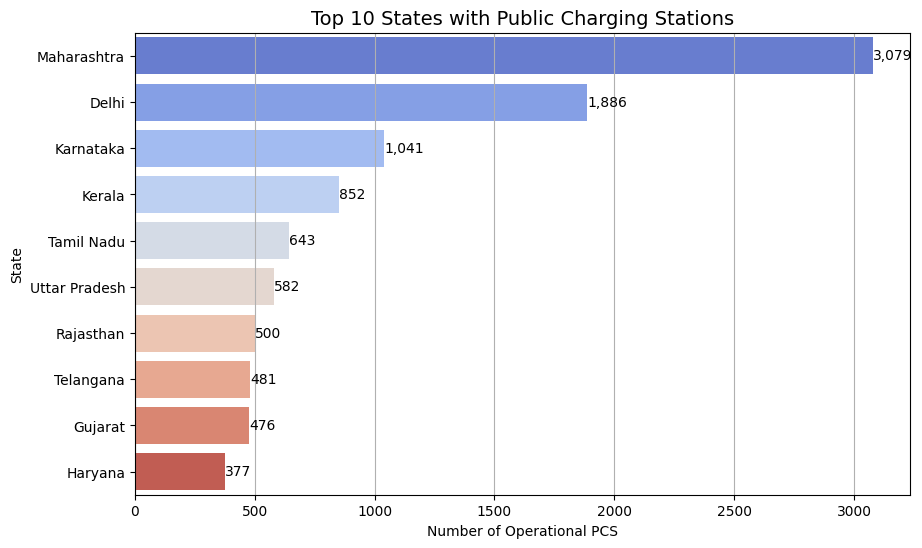

In [14]:
# Top 10 States with Public Charging Stations
plt.figure(figsize=(10, 6))
sns.barplot(data=charging_distribution.head(10),
            x='No. of Operational PCS',
            y='State',
            palette='coolwarm')
for index, value in enumerate(charging_distribution.head(10)['No. of Operational PCS']):
    plt.text(value, index, f'{value:,}', va='center')
plt.title('Top 10 States with Public Charging Stations', fontsize=14)
plt.xlabel('Number of Operational PCS')
plt.ylabel('State')
plt.grid(axis='x')
plt.show()

# Market Segmentation
This section aims to analyze and segment the electric vehicle (EV) market based on sales data and charging infrastructure across different states. By doing this, we can identify patterns and group states with similar characteristics, which is useful for making strategic business or policy decisions.

In [15]:
# Market Segmentation
# Merging EV Sales with Charging Infrastructure
state_sales = (
    ev_sales.merge(ev_maker_place, left_on='Maker', right_on='EV Maker', how='left')
    .groupby('State')
    .agg({str(year): 'sum' for year in range(2015, 2025)})
    .reset_index()
    .dropna()
)

In [16]:
# Define segmentation_data
segmentation_data = state_sales.merge(operational_pc, on='State', how='outer').fillna(0)

In [17]:
# Clustering with K-Means
features = segmentation_data.drop(columns=['State'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [18]:
# Using 3 clusters based on domain knowledge and visual assessment of elbow method
# n_init=10 ensures robust convergence by running KMeans multiple times with different centroids
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
segmentation_data['Cluster'] = kmeans.fit_predict(scaled_features)

In [19]:
# PCA for Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

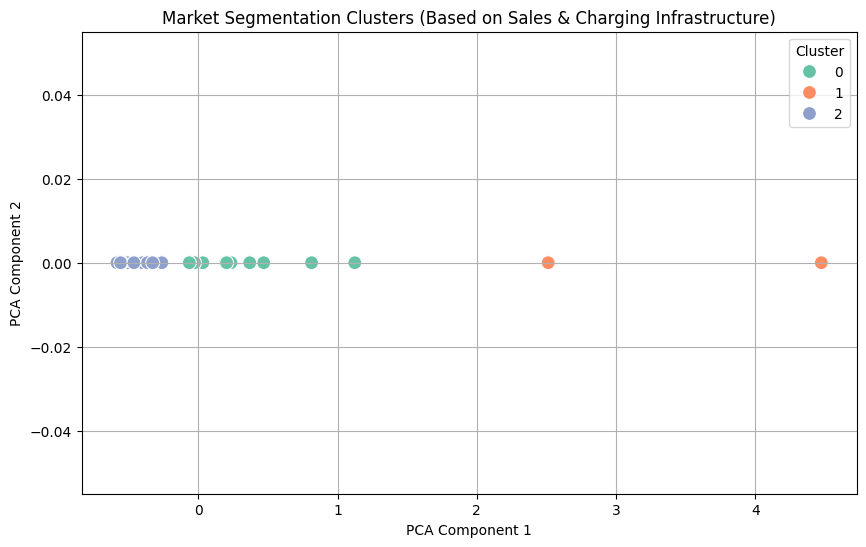

In [20]:
# Cluster Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1],
                hue=segmentation_data['Cluster'], palette='Set2', s=100)
plt.title('Market Segmentation Clusters (Based on Sales & Charging Infrastructure)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [21]:
# Key Insights
# Display cluster information
for cluster in segmentation_data['Cluster'].unique():
    cluster_states = segmentation_data[segmentation_data['Cluster'] == cluster]['State'].tolist()
    print(f"Cluster {cluster}: {len(cluster_states)} States -> {', '.join(cluster_states)}")


Cluster 2: 21 States -> Andaman & Nicobar, Arunachal Pradesh, Assam, Bihar, Chandigarh, Chhattisgarh, D&D and DNH, Goa, Himachal Pradesh, Jammu and Kashmir, Jharkhand, Lakshadweep, Manipur, Meghalaya, Nagaland, Odisha, Pondicherry, Punjab, Sikkim, Tripura, Uttarakhand
Cluster 0: 11 States -> Andhra Pradesh, Gujarat, Haryana, Karnataka, Kerala, Madhya Pradesh, Rajasthan, Tamil Nadu, Telangana, Uttar Pradesh, West Bengal
Cluster 1: 2 States -> Delhi, Maharashtra


# Forecast Next 5 Year
To predict total EV sales in India for the years 2025–2029, based on historical sales data from 2015–2024.

This helps:


* Understand the adoption rate of EVs.
* Anticipate market size and production needs.
* Plan charging infrastructure, raw material sourcing, and government policy.


In [26]:
#Import machine learninng library
from sklearn.linear_model import LinearRegression

In [27]:
# Convert 'Year' to int if not already
yearly_sales['Year'] = yearly_sales['Year'].astype(int)

In [28]:
# Prepare data for regression
X = yearly_sales['Year'].values.reshape(-1, 1)
y = yearly_sales['Total Sales'].values

In [29]:
# Train linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [30]:
# Predict for next 5 years
future_years = np.arange(2025, 2030).reshape(-1, 1)
future_sales = model.predict(future_years)

In [31]:
# Combine actual and forecasted data
forecast_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Total Sales': future_sales.astype(int)
})
combined_df = pd.concat([yearly_sales, forecast_df], ignore_index=True)

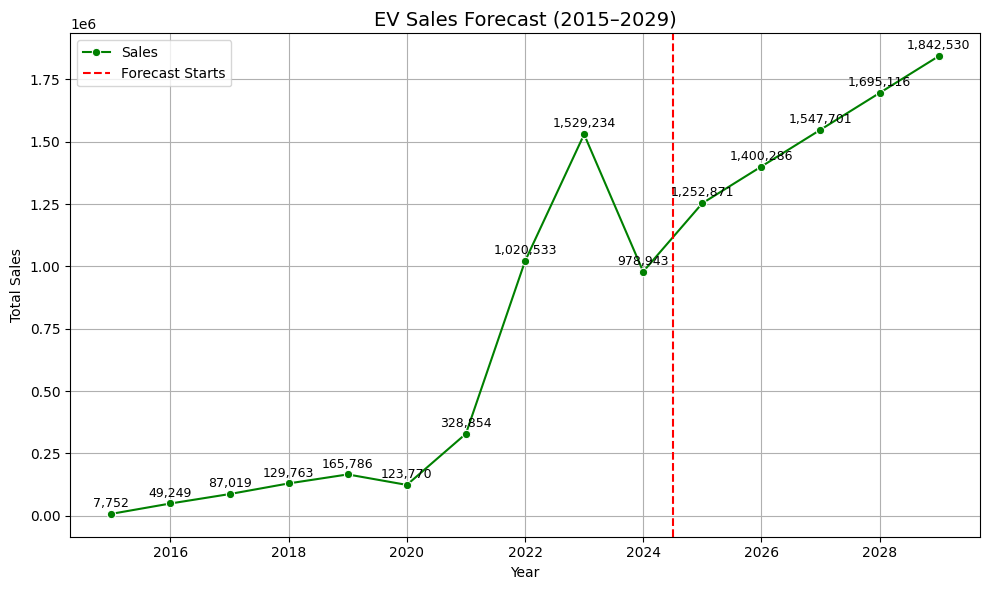

In [34]:
# Plot actual + forecast
# Plot actual + forecast with data labels
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='Year', y='Total Sales', marker='o', label='Sales', color='green')
# Add data labels to each point
for i in range(len(combined_df)):
    year = combined_df['Year'][i]
    sales = combined_df['Total Sales'][i]
    plt.text(year, sales + max(combined_df['Total Sales']) * 0.015,  # small vertical offset
             f"{sales:,}", ha='center', fontsize=9)

# Add vertical line to indicate forecast start
plt.axvline(2024.5, color='red', linestyle='--', label='Forecast Starts')

plt.title('EV Sales Forecast (2015–2029)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()